In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-04-29.csv")
df = pd.read_csv("data/inc/data-inc-2024-05-06.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117767 entries, 0 to 117766
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        117767 non-null  int64  
 1   id_mls                    117767 non-null  object 
 2   bathrooms_total           117767 non-null  float64
 3   bedrooms_extra            117767 non-null  float64
 4   bedrooms                  117767 non-null  float64
 5   stories_total             117767 non-null  float64
 6   size_interior             117767 non-null  float64
 7   building_type             117767 non-null  object 
 8   agency_name               117767 non-null  object 
 9   agency_type               117767 non-null  object 
 10  property_type             117767 non-null  object 
 11  lng                       117767 non-null  float64
 12  lat                       117767 non-null  float64
 13  ownership_type            117767 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,3,3 + 0,NaN,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
1,26846932,24010368,1,3 + 0,1.5,NaN,House,EXP REALTY,Firm,Single Family,...,42.291670,Freehold,1,30.12X96.37,0,https://realtor.ca/real-estate/26846932/3587-b...,638504281578600000,N9C1R8,Ontario,249900.0
2,26844388,24010340,1,2 + 0,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.306440,Freehold,1,35.01X121,0,https://realtor.ca/real-estate/26844388/859-we...,638503636611730000,N9A5J7,Ontario,299000.0
3,26843583,24010339,1,2 + 0,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.297308,Freehold,1,40X93,0,https://realtor.ca/real-estate/26843583/2193-f...,638503600882600000,N8W2G4,Ontario,399900.0
4,26843183,24010329,1,2 + 1,1.0,NaN,House,ELITE REAL ESTATE LIMITED,Firm,Single Family,...,42.295689,Freehold,1,34X94 FEET,0,https://realtor.ca/real-estate/26843183/2260-h...,638503564680530000,N8X3S4,Ontario,249933.0


In [5]:
df.shape

(28859, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28859 entries, 0 to 28858
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28859 non-null  int64  
 1   id_mls                    28859 non-null  object 
 2   bathrooms_total           28859 non-null  int64  
 3   bedrooms                  28859 non-null  object 
 4   stories_total             18798 non-null  float64
 5   size_interior             14641 non-null  object 
 6   building_type             28859 non-null  object 
 7   agency_name               28859 non-null  object 
 8   agency_type               28859 non-null  object 
 9   property_type             28859 non-null  object 
 10  lng                       28859 non-null  float64
 11  lat                       28859 non-null  float64
 12  ownership_type            28859 non-null  object 
 13  ownership_type_group_ids  28859 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,3,3 + 0,NaN,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
6,26843181,24010331,2,2 + 0,NaN,1100.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.273725,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
8,26842326,24010317,2,2 + 0,NaN,960.0000,Apartment,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.309825,Cooperative,none,0X,0,https://realtor.ca/real-estate/26842326/955-ou...,638503528503670000,N9A4J5,Ontario,479900.0
15,26841200,24010176,2,2 + 0,NaN,1595.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.102140,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26841200/252-da...,638503456637300000,N9V1W7,Ontario,749900.0
16,26841201,24010173,2,2 + 0,NaN,1595.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,Single Family,...,42.102140,Freehold,1,0X,0,https://realtor.ca/real-estate/26841201/252-da...,638503456643200000,N9V1W7,Ontario,749900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28853,26822141,5784,2,3,NaN,1202 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.453405,none,none,6616,0,https://realtor.ca/real-estate/26822141/258-bo...,638501032475300000,NaN,Northwest Territories,409900.0
28854,26821369,5783,3,6,NaN,2500 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.459718,Condominium/Strata,2,5532,0,https://realtor.ca/real-estate/26821369/32-tra...,638500983364370000,NaN,Northwest Territories,644900.0
28855,26817190,5782,4,4,NaN,2375 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.438868,none,none,7156,0,https://realtor.ca/real-estate/26817190/56-cal...,638500289575830000,X1A3T4,Northwest Territories,749900.0
28857,26814421,5780,1,3,NaN,1067 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.439685,Condominium/Strata,2,4102,0,https://realtor.ca/real-estate/26814421/730-bi...,638500073930700000,NaN,Northwest Territories,329000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4411
Ontario                    3808
Alberta                    2986
Quebec                     1679
Manitoba                    642
Saskatchewan                612
New Brunswick               360
Newfoundland & Labrador     122
Northwest Territories        11
Yukon                        10
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    14125
British Columbia            4706
Quebec                      3887
Alberta                     3193
Manitoba                     769
Saskatchewan                 726
Nova Scotia                  616
New Brunswick                509
Newfoundland & Labrador      162
Prince Edward Island         141
Yukon                         13
Northwest Territories         12
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,28859.0,28859.0,18798.0,28859.0,28859.0,28859.0,2.885900e+04,28859.0
mean,26830733.0,2.0,2.0,-90.0,46.0,3.0,6.385021e+17,880162.0
std,10759.0,1.0,3.0,19.0,3.0,6.0,1.381470e+12,1054506.0
min,26811883.0,0.0,0.0,-135.0,42.0,0.0,6.384991e+17,0.0
25%,26821450.0,1.0,1.0,-113.0,44.0,0.0,6.385010e+17,425000.0
50%,26830852.0,2.0,2.0,-80.0,45.0,1.0,6.385019e+17,669000.0
75%,26840000.0,3.0,2.0,-79.0,49.0,4.0,6.385030e+17,999000.0
max,26849449.0,18.0,250.0,-53.0,62.0,529.0,6.385057e+17,49800000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

28845

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

28


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
28110,26813551,E4384459,3,3,2.0,227.36 m2,House,Realty72,Firm,Single Family,...,53.421974,Freehold,1,423.32 m2,2,https://realtor.ca/real-estate/26813551/15872-...,638500007916200000,T6W2N5,Alberta,725000.0
28107,26813551,E4384459,3,3,2.0,227.36 m2,House,Realty72,Firm,Single Family,...,53.421974,Freehold,1,423.32 m2,2,https://realtor.ca/real-estate/26813551/15872-...,638500007916200000,T6W2N5,Alberta,725000.0
9375,26813664,C8278896,3,4,2.0,NaN,House,RE/MAX REALTRON TNS REALTY INC.,Firm,Single Family,...,43.714786,Freehold,1,27 x 125 FT,3,https://realtor.ca/real-estate/26813664/952-eg...,638500011200430000,M4G2L3,Ontario,1299000.0
9373,26813664,C8278896,3,4,2.0,NaN,House,RE/MAX REALTRON TNS REALTY INC.,Firm,Single Family,...,43.714786,Freehold,1,27 x 125 FT,3,https://realtor.ca/real-estate/26813664/952-eg...,638500011200430000,M4G2L3,Ontario,1299000.0
21058,26816194,R2876330,1,2,NaN,806 sqft,Apartment,Dracco Pacific Realty,Firm,Single Family,...,49.278259,Strata,2,0,1,https://realtor.ca/real-estate/26816194/1806-1...,638500171469330000,V6B1T8,British Columbia,838000.0
21055,26816194,R2876330,1,2,NaN,806 sqft,Apartment,Dracco Pacific Realty,Firm,Single Family,...,49.278259,Strata,2,0,1,https://realtor.ca/real-estate/26816194/1806-1...,638500171469330000,V6B1T8,British Columbia,838000.0
22363,26817364,R2872401,3,3,NaN,2100.0000,House,RE/MAX Colonial Pacific Realty,Firm,Single Family,...,49.030535,Freehold,1,46191.81 sqft,0,https://realtor.ca/real-estate/26817364/15654-...,638500302738430000,V4A1R9,British Columbia,18000000.0
22362,26817364,R2872401,3,3,NaN,2100.0000,House,RE/MAX Colonial Pacific Realty,Firm,Single Family,...,49.030535,Freehold,1,46191.81 sqft,0,https://realtor.ca/real-estate/26817364/15654-...,638500302738430000,V4A1R9,British Columbia,18000000.0
11296,26821810,S8289144,3,4,2.0,NaN,House,CENTURY 21 B.J. ROTH REALTY LTD.,Firm,Single Family,...,44.606490,Freehold,1,39.37 x 114.83 FT,6,https://realtor.ca/real-estate/26821810/88-atl...,638501020410170000,L3V8L4,Ontario,999888.0
11295,26821810,S8289144,3,4,2.0,NaN,House,CENTURY 21 B.J. ROTH REALTY LTD.,Firm,Single Family,...,44.606490,Freehold,1,39.37 x 114.83 FT,6,https://realtor.ca/real-estate/26821810/88-atl...,638501020410170000,L3V8L4,Ontario,999888.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
28110,26813551,E4384459,3,3,2.0,227.36 m2,House,Realty72,Firm,Single Family,...,53.421974,Freehold,1,423.32 m2,2,https://realtor.ca/real-estate/26813551/15872-...,638500007916200000,T6W2N5,Alberta,725000.0
9375,26813664,C8278896,3,4,2.0,NaN,House,RE/MAX REALTRON TNS REALTY INC.,Firm,Single Family,...,43.714786,Freehold,1,27 x 125 FT,3,https://realtor.ca/real-estate/26813664/952-eg...,638500011200430000,M4G2L3,Ontario,1299000.0
21058,26816194,R2876330,1,2,NaN,806 sqft,Apartment,Dracco Pacific Realty,Firm,Single Family,...,49.278259,Strata,2,0,1,https://realtor.ca/real-estate/26816194/1806-1...,638500171469330000,V6B1T8,British Columbia,838000.0
22363,26817364,R2872401,3,3,NaN,2100.0000,House,RE/MAX Colonial Pacific Realty,Firm,Single Family,...,49.030535,Freehold,1,46191.81 sqft,0,https://realtor.ca/real-estate/26817364/15654-...,638500302738430000,V4A1R9,British Columbia,18000000.0
11296,26821810,S8289144,3,4,2.0,NaN,House,CENTURY 21 B.J. ROTH REALTY LTD.,Firm,Single Family,...,44.606490,Freehold,1,39.37 x 114.83 FT,6,https://realtor.ca/real-estate/26821810/88-atl...,638501020410170000,L3V8L4,Ontario,999888.0
7174,26829751,W8293932,2,2 + 1,NaN,NaN,none,CENTURY 21 GREEN REALTY INC.,Firm,Single Family,...,43.602956,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26829751/1613-5...,638501910625030000,L5R1Y1,Ontario,829900.0
20457,26831523,R2877717,5,5,NaN,2770 sqft,House,Luxmore Realty,Firm,Single Family,...,49.251292,Freehold,1,4026 sqft,2,https://realtor.ca/real-estate/26831523/3847-w...,638501971932730000,V6S1L8,British Columbia,4280000.0
22956,26831958,10311783,2,3,2.0,1698 sqft,Duplex,RE/MAX Penticton Realty,Firm,Single Family,...,49.482971,Freehold,1,under 1 acre,1,https://realtor.ca/real-estate/26831958/1603-c...,638502024057000000,V2A6Y1,British Columbia,635000.0
6374,26835866,E8298570,7,5 + 1,2.0,NaN,House,RE/MAX IMPACT REALTY,Firm,Single Family,...,43.815872,Freehold,1,50 x 230 FT,8,https://realtor.ca/real-estate/26835866/1435-o...,638502675881200000,L1V1N8,Ontario,2990000.0
10896,26835956,S8298180,1,1,NaN,NaN,Apartment,RE/MAX CROSSTOWN REALTY INC.,Firm,Single Family,...,44.379224,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26835956/1706-7...,638502677005800000,L4N7R6,Ontario,469000.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(28831, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28831 entries, 0 to 28858
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        28831 non-null  int64  
 1   id_mls                    28831 non-null  object 
 2   bathrooms_total           28831 non-null  int64  
 3   bedrooms                  28831 non-null  object 
 4   stories_total             18782 non-null  float64
 5   size_interior             14629 non-null  object 
 6   building_type             28831 non-null  object 
 7   agency_name               28831 non-null  object 
 8   agency_type               28831 non-null  object 
 9   property_type             28831 non-null  object 
 10  lng                       28831 non-null  float64
 11  lat                       28831 non-null  float64
 12  ownership_type            28831 non-null  object 
 13  ownership_type_group_ids  28831 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  16315
none                       4715
Condominium/Strata         4537
Strata                     2127
Condominium                 656
Leasehold                   193
Freehold Condo              107
Leasehold Condo/Strata       52
Undivided Co-ownership       45
Shares in Co-operative       22
Other, See Remarks           19
Unknown                      12
Leasehold/Leased Land        12
Timeshare/Fractional         11
Cooperative                   4
Life Lease                    4
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                       16057
Apartment                    5202
Row / Townhouse              2956
none                         2389
Duplex                        696
Mobile Home                   246
No Building                   211
Triplex                       203
Multi-Family                  173
Unknown                       164
Fourplex                      124
Other                         109
Recreational                   98
Manufactured Home              88
Manufactured Home/Mobile       72
Modular                        20
Two Apartment House            11
Parking                         7
Commercial Mix                  4
Floathome                       1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              53
none                  43
Strata                 9
Condominium/Strata     3
Freehold Condo         1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    25810
Vacant Land       2303
Multi-family       470
Agriculture        162
Recreational        81
Parking              5
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25810 entries, 0 to 28858
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25810 non-null  int64  
 1   id_mls                    25810 non-null  object 
 2   bathrooms_total           25810 non-null  int64  
 3   bedrooms                  25810 non-null  object 
 4   stories_total             18373 non-null  float64
 5   size_interior             14270 non-null  object 
 6   building_type             25810 non-null  object 
 7   agency_name               25810 non-null  object 
 8   agency_type               25810 non-null  object 
 9   property_type             25810 non-null  object 
 10  lng                       25810 non-null  float64
 11  lat                       25810 non-null  float64
 12  ownership_type            25810 non-null  object 
 13  ownership_type_group_ids  25810 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    12870
British Columbia            4354
Quebec                      3396
Alberta                     2953
Manitoba                     644
Saskatchewan                 610
Nova Scotia                  440
New Brunswick                333
Newfoundland & Labrador      114
Prince Edward Island          73
Northwest Territories         12
Yukon                         11
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       16046
Apartment                    5196
Row / Townhouse              2955
Duplex                        582
none                          279
Mobile Home                   246
Triplex                       157
Manufactured Home              87
Fourplex                       87
Manufactured Home/Mobile       72
Recreational                   41
Other                          28
Modular                        20
Two Apartment House            11
Floathome                       1
Multi-Family                    1
Parking                         1
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  14815
Condominium/Strata         4508
none                       3274
Strata                     2101
Condominium                 654
Leasehold                   185
Freehold Condo              107
Leasehold Condo/Strata       52
Undivided Co-ownership       45
Shares in Co-operative       17
Other, See Remarks           15
Leasehold/Leased Land        12
Timeshare/Fractional          9
Unknown                       8
Cooperative                   4
Life Lease                    4
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13,26841820,X8302210,2,3 + 2,2.0,NaN,Duplex,HOUSEEO REALTY,Firm,Single Family,...,42.318113,none,none,30.11 x 109.88 FT,0,https://realtor.ca/real-estate/26841820/1171-a...,638503472806730000,N8Y3P5,Ontario,99999.0
28,26838462,X8299800,2,4,2.0,NaN,Duplex,CIRCLE REAL ESTATE,Firm,Single Family,...,42.310172,none,none,41 x 120 FT,4,https://realtor.ca/real-estate/26838462/957-59...,638502822862870000,N9A4N5,Ontario,599000.0
48,26834939,24010188,2,2 + 0,NaN,1172.0000,Apartment,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.319683,none,none,0X,0,https://realtor.ca/real-estate/26834939/75-riv...,638502628515000000,N9A7C4,Ontario,499000.0
98,26823968,X8290776,2,3,2.0,NaN,Duplex,RIGHT AT HOME REALTY,Firm,Single Family,...,42.316386,none,none,40.5 x 151 FT,0,https://realtor.ca/real-estate/26823968/867-la...,638501239001830000,N9A2G9,Ontario,489000.0
118,26818594,24009908,2,2 + 0,1.0,1704.0000,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,Single Family,...,42.269997,none,none,38XIRREG,0,https://realtor.ca/real-estate/26818594/668-li...,638500790520370000,N6E3N7,Ontario,849900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,26826377,5785,3,4,NaN,2393 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.440887,none,none,9113,0,https://realtor.ca/real-estate/26826377/1-cinn...,638501752571430000,NaN,Northwest Territories,788000.0
28853,26822141,5784,2,3,NaN,1202 sqft,Manufactured Home,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.453405,none,none,6616,0,https://realtor.ca/real-estate/26822141/258-bo...,638501032475300000,NaN,Northwest Territories,409900.0
28855,26817190,5782,4,4,NaN,2375 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.438868,none,none,7156,0,https://realtor.ca/real-estate/26817190/56-cal...,638500289575830000,X1A3T4,Northwest Territories,749900.0
28856,26816907,5781,0,1,NaN,NaN,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.451848,none,none,4994,0,https://realtor.ca/real-estate/26816907/5111-5...,638500251560300000,NaN,Northwest Territories,249900.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

13       https://realtor.ca/real-estate/26841820/1171-a...
28       https://realtor.ca/real-estate/26838462/957-59...
48       https://realtor.ca/real-estate/26834939/75-riv...
98       https://realtor.ca/real-estate/26823968/867-la...
118      https://realtor.ca/real-estate/26818594/668-li...
                               ...                        
28852    https://realtor.ca/real-estate/26826377/1-cinn...
28853    https://realtor.ca/real-estate/26822141/258-bo...
28855    https://realtor.ca/real-estate/26817190/56-cal...
28856    https://realtor.ca/real-estate/26816907/5111-5...
28858    https://realtor.ca/real-estate/26813716/514-ha...
Name: page_url, Length: 3274, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

1596     https://realtor.ca/real-estate/26820201/22790-...
1711     https://realtor.ca/real-estate/26814168/22790-...
1975     https://realtor.ca/real-estate/26813039/930-la...
2260     https://realtor.ca/real-estate/26848784/77307-...
2791     https://realtor.ca/real-estate/26824962/9910-n...
2799     https://realtor.ca/real-estate/26824440/261-st...
3445     https://realtor.ca/real-estate/26837983/33-wat...
4030     https://realtor.ca/real-estate/26822266/6-elm-...
4052     https://realtor.ca/real-estate/26821447/25-mac...
4252     https://realtor.ca/real-estate/26815687/99-fou...
7789     https://realtor.ca/real-estate/26825388/1501-l...
10207    https://realtor.ca/real-estate/26840658/102-ro...
10313    https://realtor.ca/real-estate/26828932/142571...
10387    https://realtor.ca/real-estate/26822112/35-bra...
10502    https://realtor.ca/real-estate/26848912/6-gree...
10575    https://realtor.ca/real-estate/26846411/23-rec...
10887    https://realtor.ca/real-estate/26836639/76-mai.

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Parking,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,,,
Alberta,558,221,0,3,1731,8,59,39,0,0,0,1,5,326,1,0,1
British Columbia,1394,121,1,1,2034,76,12,17,0,0,0,0,2,689,2,0,5
Manitoba,84,17,0,0,506,0,0,20,0,0,1,0,0,16,0,0,0
New Brunswick,4,0,0,0,315,0,0,4,0,0,0,0,0,6,0,0,4
Newfoundland & Labrador,0,0,0,0,101,0,0,1,0,1,0,0,0,0,0,11,0
Northwest Territories,1,0,0,0,7,3,0,1,0,0,0,0,0,0,0,0,0
Nova Scotia,19,3,0,0,363,0,0,15,0,0,0,0,27,12,0,0,1
Ontario,2267,42,0,9,8372,0,0,91,19,0,27,0,6,1795,17,0,225
Prince Edward Island,4,2,0,0,59,0,0,4,0,0,0,0,0,4,0,0,0


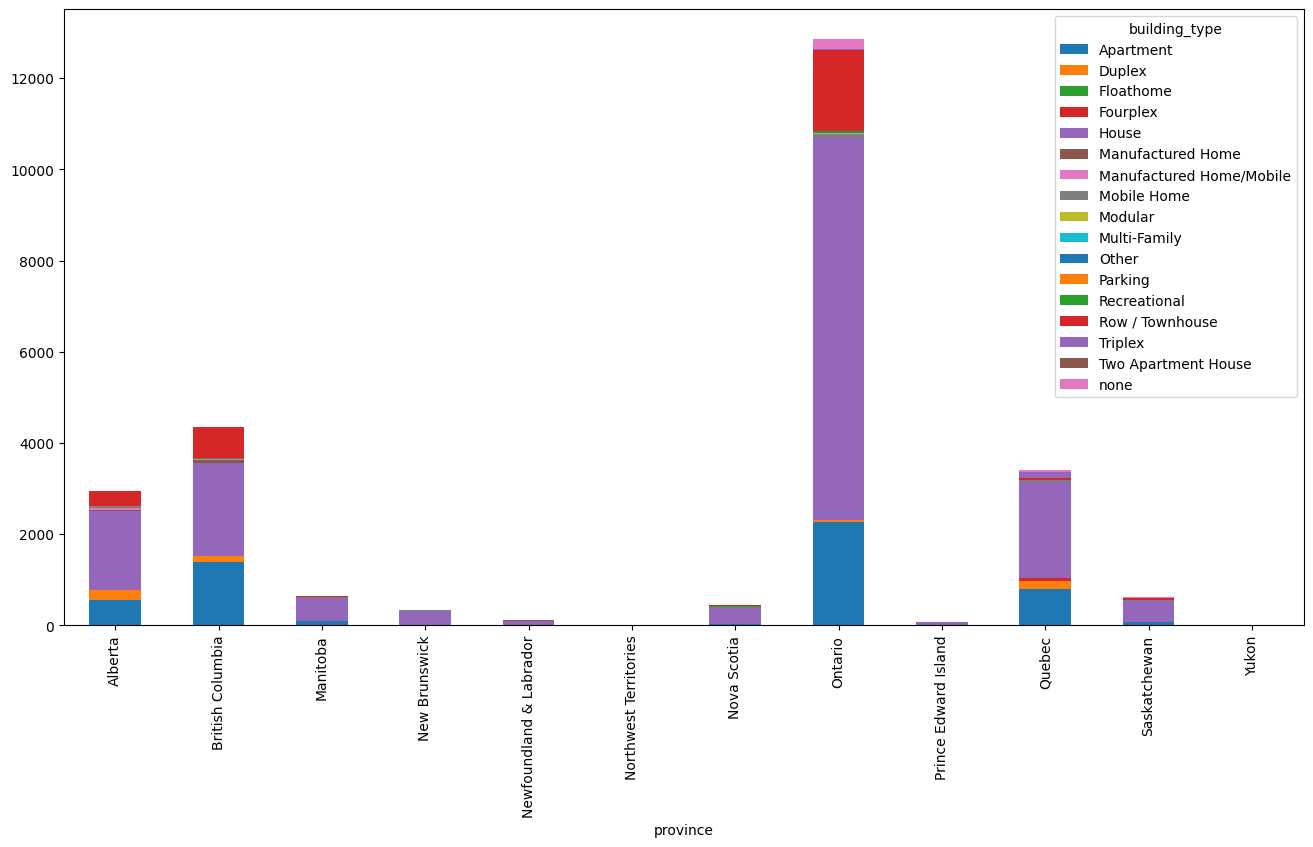

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

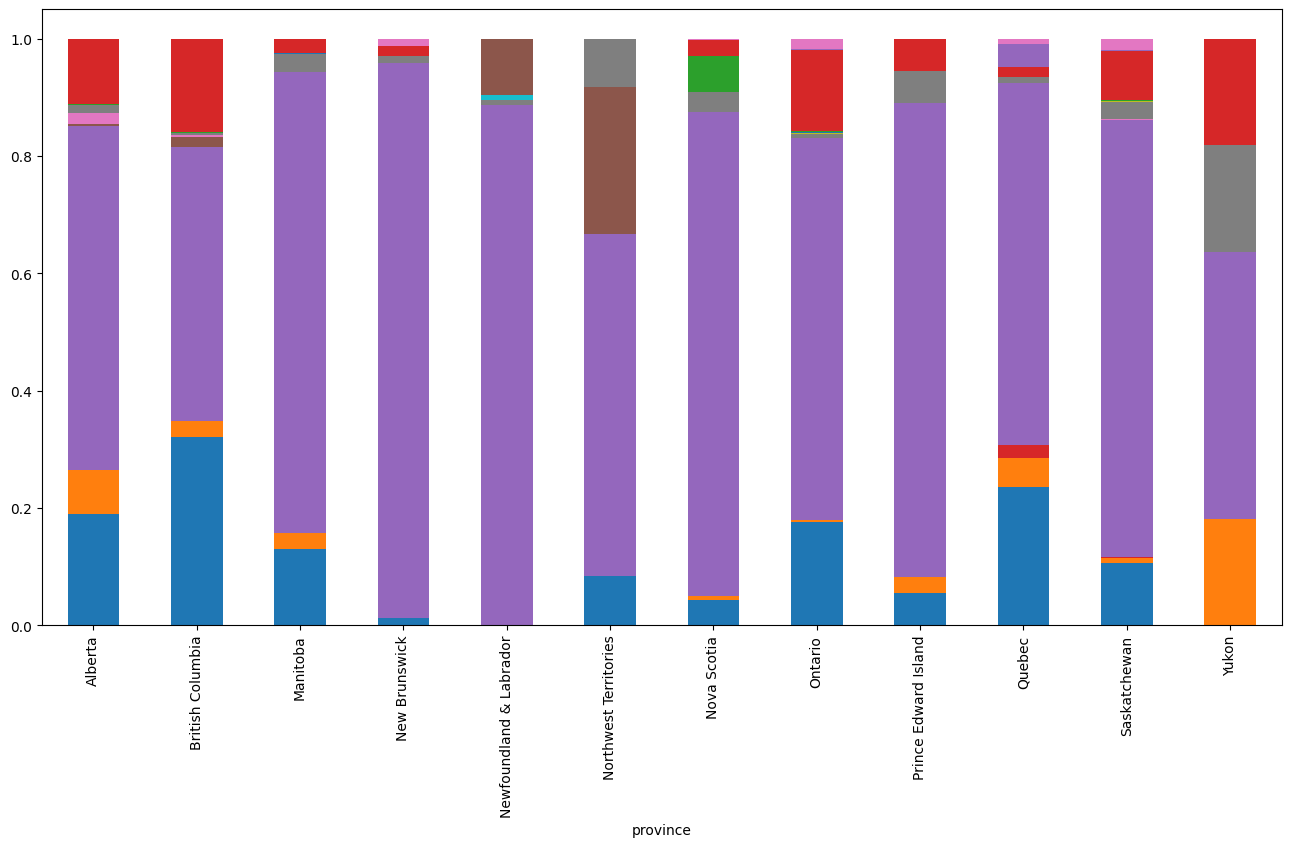

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,895,0,1905,0,10,0,0,0,0,0,0,0,0,0,143
British Columbia,0,57,0,1985,0,57,45,12,0,11,8,2101,4,0,2,72
Manitoba,0,0,0,518,107,18,0,0,0,0,0,0,0,0,1,0
New Brunswick,0,11,0,213,0,10,0,0,0,0,0,0,0,0,2,97
Newfoundland & Labrador,0,0,0,111,0,1,0,0,0,0,0,0,0,0,0,2
Northwest Territories,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,10
Nova Scotia,0,25,0,404,0,9,0,0,0,0,0,0,0,0,2,0
Ontario,654,2557,4,9136,0,66,7,0,4,4,9,0,5,1,0,423
Prince Edward Island,0,8,0,64,0,0,0,0,0,0,0,0,0,0,1,0


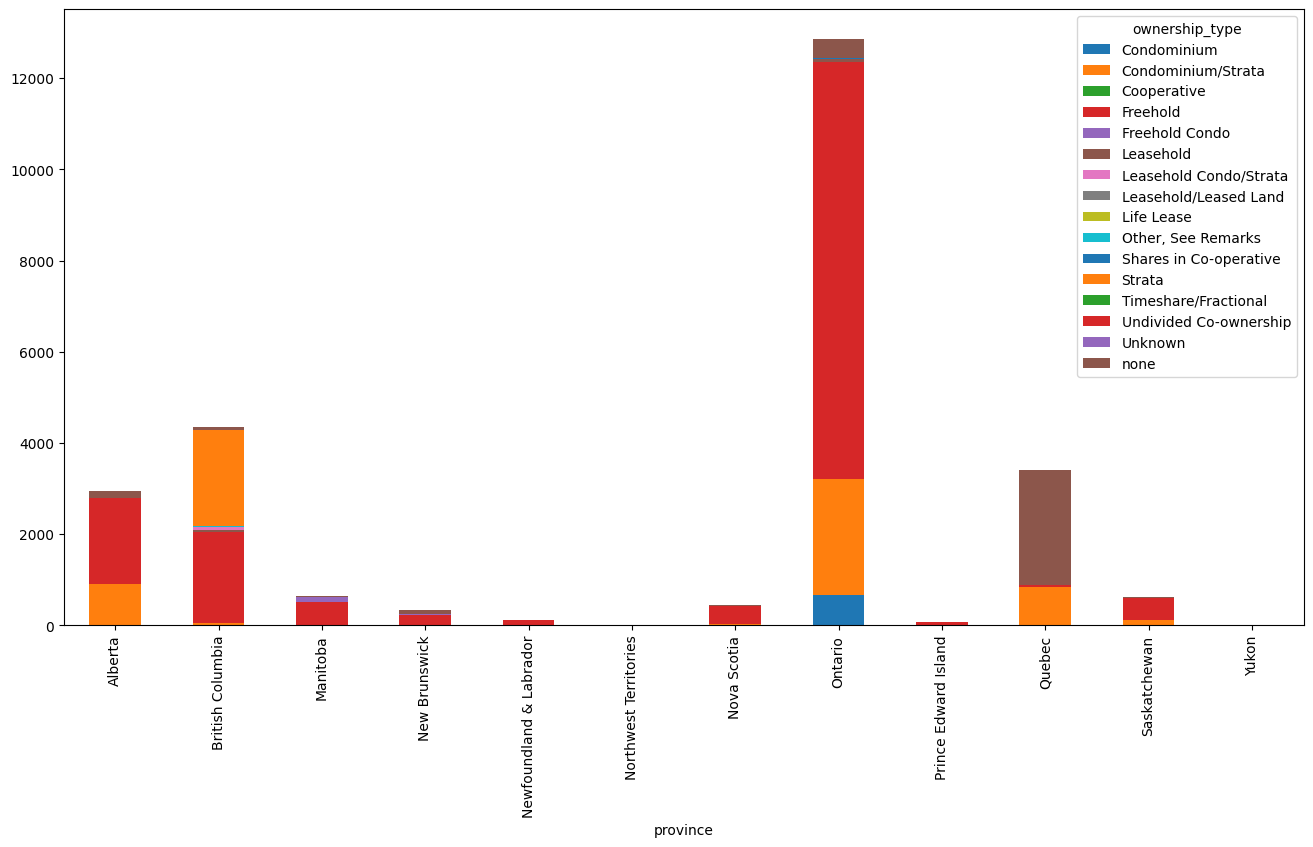

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

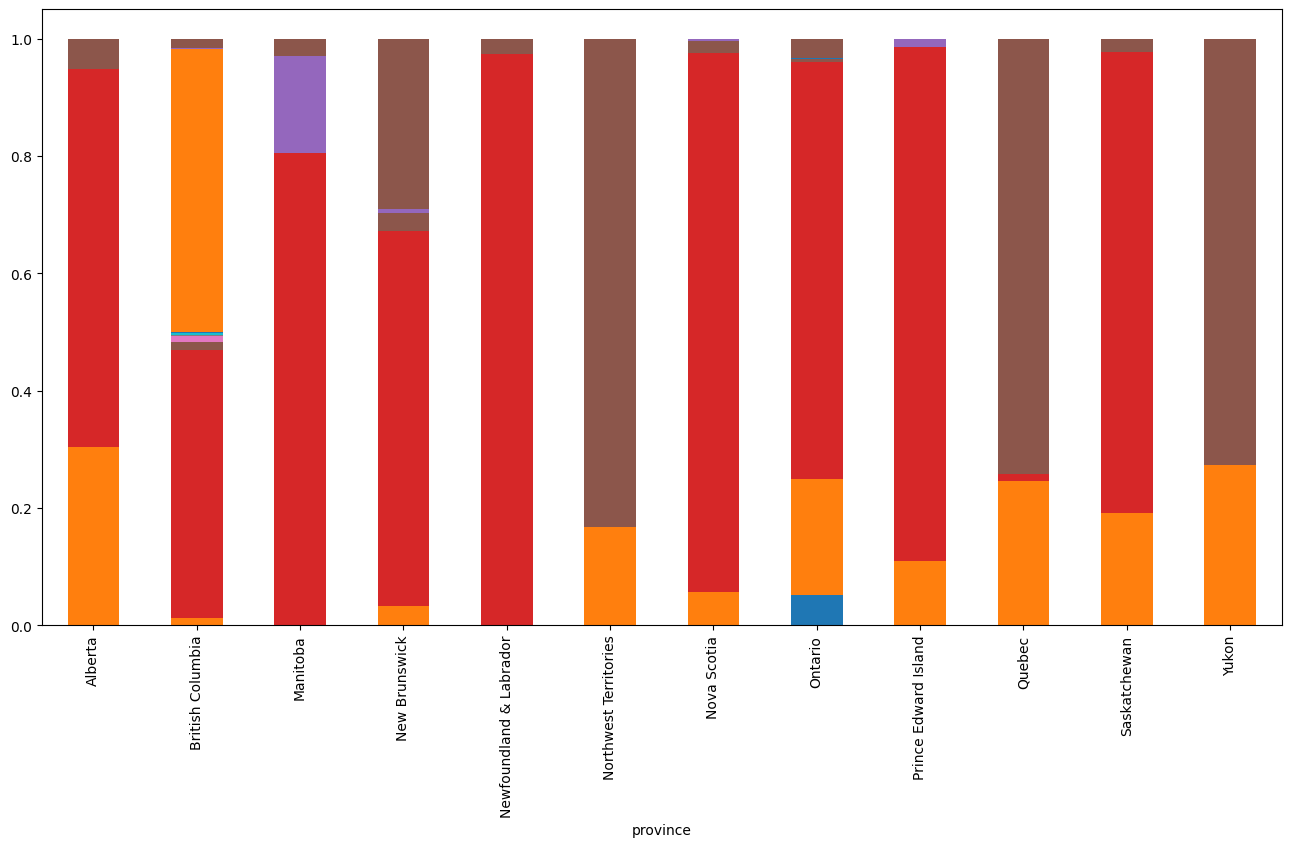

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        3278
Strata                    1286
Condominium                380
Freehold Condo              81
Leasehold Condo/Strata      44
Undivided Co-ownership      44
Freehold                    33
Shares in Co-operative      14
none                        10
Leasehold                   10
Timeshare/Fractional         5
Cooperative                  4
Leasehold/Leased Land        3
Life Lease                   2
Other, See Remarks           2
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                 257
none                     212
Strata                    73
Condominium/Strata        39
Leasehold/Leased Land      1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Floathome,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Parking,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,,,
Condominium,380,0,0,0,16,0,0,0,0,0,0,0,0,255,0,0,3
Condominium/Strata,3278,39,0,1,86,0,14,2,0,0,3,1,0,1062,0,0,22
Cooperative,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Freehold,33,257,0,3,13324,13,55,50,6,1,0,0,36,970,4,11,52
Freehold Condo,81,0,0,0,13,0,0,0,0,0,1,0,0,12,0,0,0
Leasehold,10,0,1,0,65,26,2,60,14,0,0,0,2,3,0,0,2
Leasehold Condo/Strata,44,0,0,0,0,0,0,1,0,0,0,0,0,6,0,0,1
Leasehold/Leased Land,3,1,0,0,6,2,0,0,0,0,0,0,0,0,0,0,0
Life Lease,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0


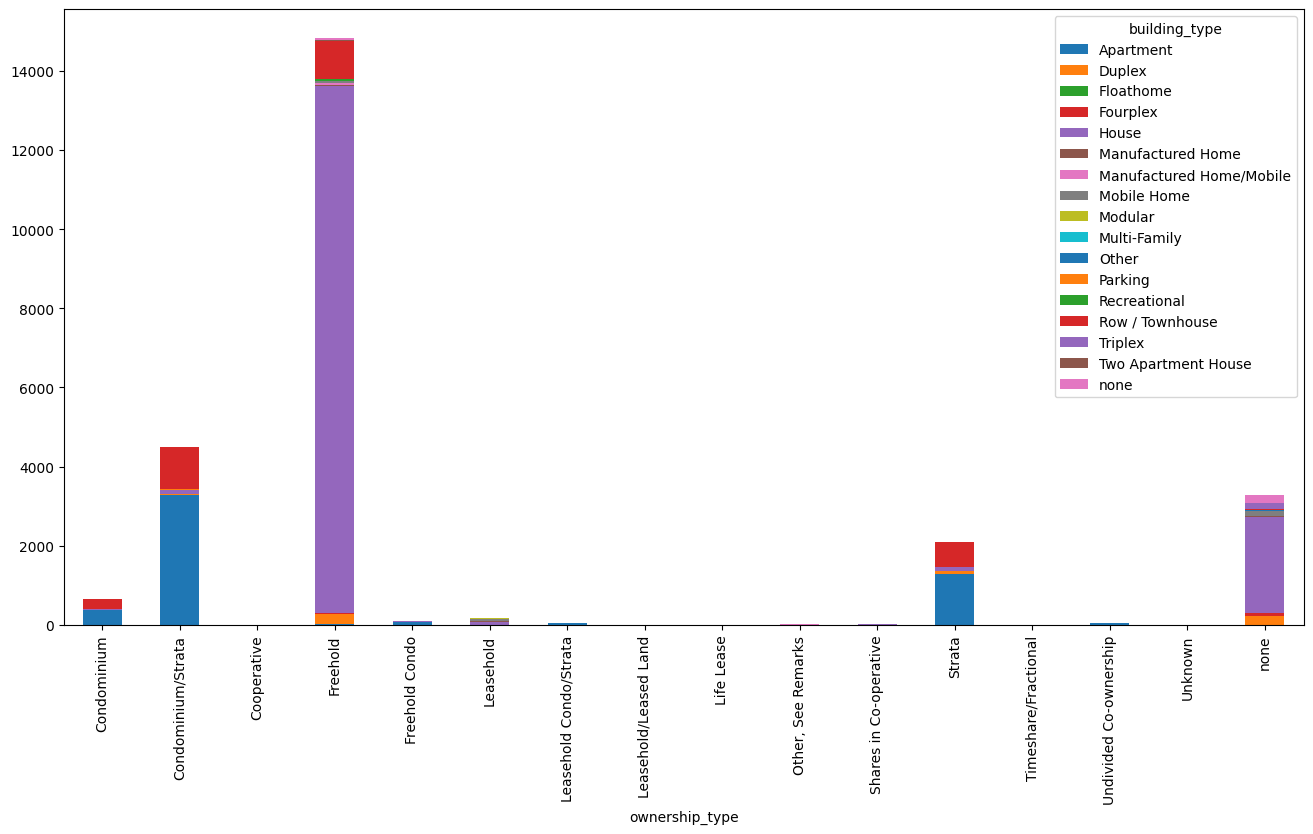

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

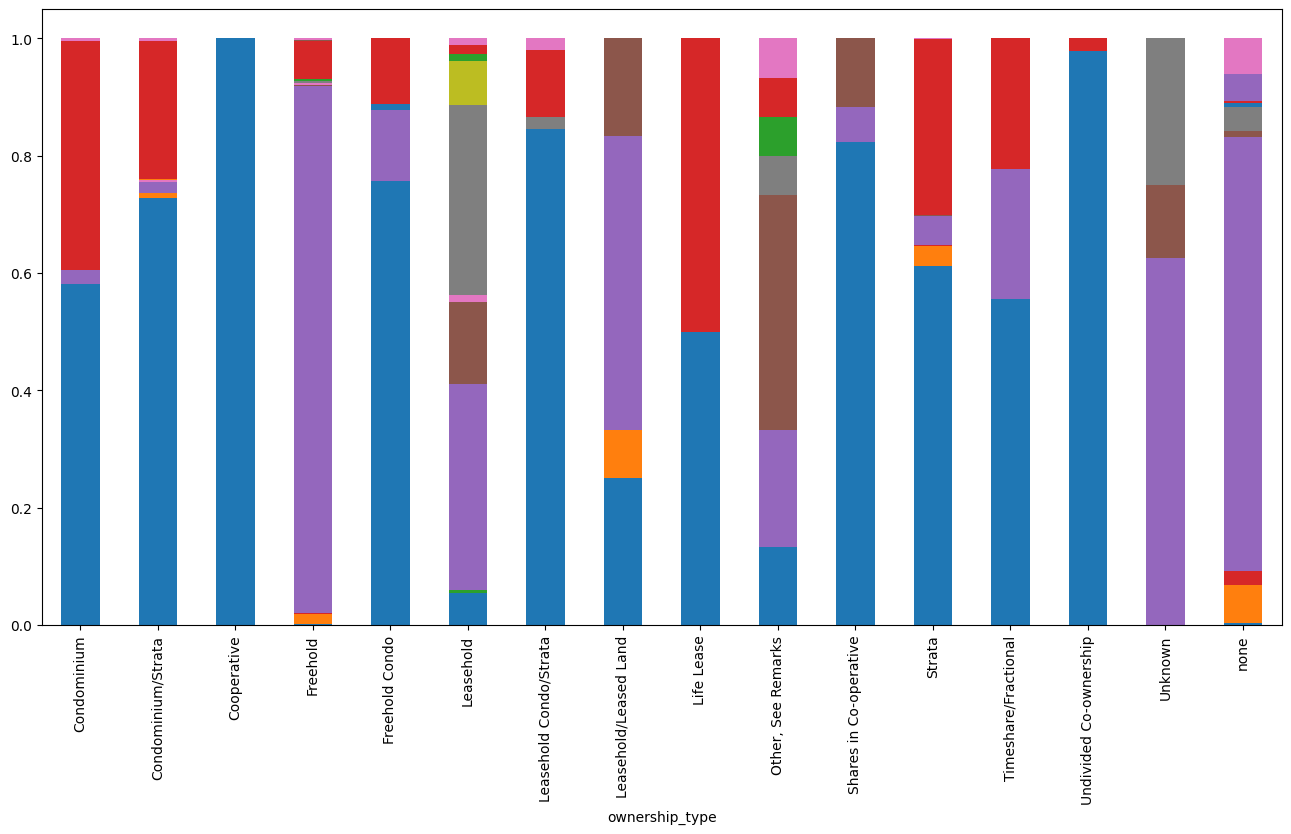

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,582.0,582.0,349.0,582.0,582.0,582.0,5.820000e+02,582.0
mean,26832115.0,2.0,2.0,-100.0,49.0,2.0,6.385023e+17,699252.0
std,11134.0,1.0,1.0,21.0,3.0,2.0,1.470531e+12,473278.0
min,26812342.0,0.0,0.0,-135.0,42.0,0.0,6.384994e+17,24900.0
25%,26822647.0,1.0,2.0,-114.0,46.0,0.0,6.385011e+17,399000.0
50%,26832970.0,3.0,2.0,-113.0,49.0,2.0,6.385022e+17,569500.0
75%,26842234.0,3.0,2.0,-74.0,51.0,4.0,6.385035e+17,849000.0
max,26849440.0,8.0,3.0,-62.0,61.0,16.0,6.385057e+17,3149000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,157.0,157.0,87.0,157.0,157.0,157.0,1.570000e+02,157.0
mean,26830999.0,1.0,2.0,-75.0,46.0,3.0,6.385021e+17,869012.0
std,11285.0,1.0,1.0,7.0,1.0,4.0,1.507851e+12,362233.0
min,26811994.0,1.0,1.0,-123.0,43.0,0.0,6.384992e+17,179000.0
25%,26821844.0,1.0,2.0,-74.0,45.0,0.0,6.385010e+17,649999.0
50%,26831810.0,1.0,2.0,-74.0,46.0,3.0,6.385020e+17,829900.0
75%,26840014.0,2.0,3.0,-74.0,46.0,6.0,6.385030e+17,949000.0
max,26849083.0,7.0,3.0,-71.0,54.0,21.0,6.385055e+17,2500000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,87.0,87.0,50.0,87.0,87.0,87.0,8.700000e+01,87.0
mean,26830840.0,1.0,2.0,-76.0,46.0,3.0,6.385021e+17,961123.0
std,10955.0,1.0,1.0,9.0,2.0,3.0,1.427762e+12,440619.0
min,26812127.0,1.0,1.0,-119.0,43.0,0.0,6.384993e+17,299900.0
25%,26823696.0,1.0,2.0,-74.0,45.0,0.0,6.385012e+17,707450.0
50%,26829061.0,1.0,2.0,-74.0,46.0,2.0,6.385019e+17,879000.0
75%,26839906.0,1.0,2.0,-73.0,46.0,6.0,6.385030e+17,1225000.0
max,26849201.0,8.0,4.0,-70.0,54.0,10.0,6.385055e+17,2490000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2955.0,2955.0,2177.0,2955.0,2955.0,2955.0,2.955000e+03,2955.0
mean,26830708.0,3.0,2.0,-94.0,46.0,2.0,6.385021e+17,754019.0
std,10588.0,1.0,1.0,19.0,3.0,2.0,1.336096e+12,380525.0
min,26811884.0,0.0,1.0,-135.0,42.0,0.0,6.384991e+17,2550.0
25%,26821484.0,2.0,2.0,-114.0,43.0,1.0,6.385010e+17,539000.0
50%,26830547.0,3.0,2.0,-80.0,44.0,2.0,6.385019e+17,699900.0
75%,26839956.0,3.0,3.0,-80.0,49.0,2.0,6.385030e+17,899000.0
max,26849429.0,10.0,4.0,-63.0,61.0,102.0,6.385057e+17,5850000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       16046
Apartment                    5196
Row / Townhouse              2955
Semi-Detached                 826
none                          279
Mobile Home                   246
Manufactured Home              87
Manufactured Home/Mobile       72
Recreational                   41
Other                          28
Modular                        20
Two Apartment House            11
Floathome                       1
Multi-Family                    1
Parking                         1
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              16046
Apartment           5196
Row / Townhouse     2955
Semi-Detached        826
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25023 entries, 0 to 28856
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25023 non-null  int64  
 1   id_mls                    25023 non-null  object 
 2   bathrooms_total           25023 non-null  int64  
 3   bedrooms                  25023 non-null  object 
 4   stories_total             17867 non-null  float64
 5   size_interior             13743 non-null  object 
 6   building_type             25023 non-null  object 
 7   agency_name               25023 non-null  object 
 8   agency_type               25023 non-null  object 
 9   property_type             25023 non-null  object 
 10  lng                       25023 non-null  float64
 11  lat                       25023 non-null  float64
 12  ownership_type            25023 non-null  object 
 13  ownership_type_group_ids  25023 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    12502
British Columbia            4241
Quebec                      3331
Alberta                     2840
Manitoba                     623
Saskatchewan                 577
Nova Scotia                  397
New Brunswick                325
Newfoundland & Labrador      101
Prince Edward Island          69
Yukon                          9
Northwest Territories          8
Name: count, dtype: int64

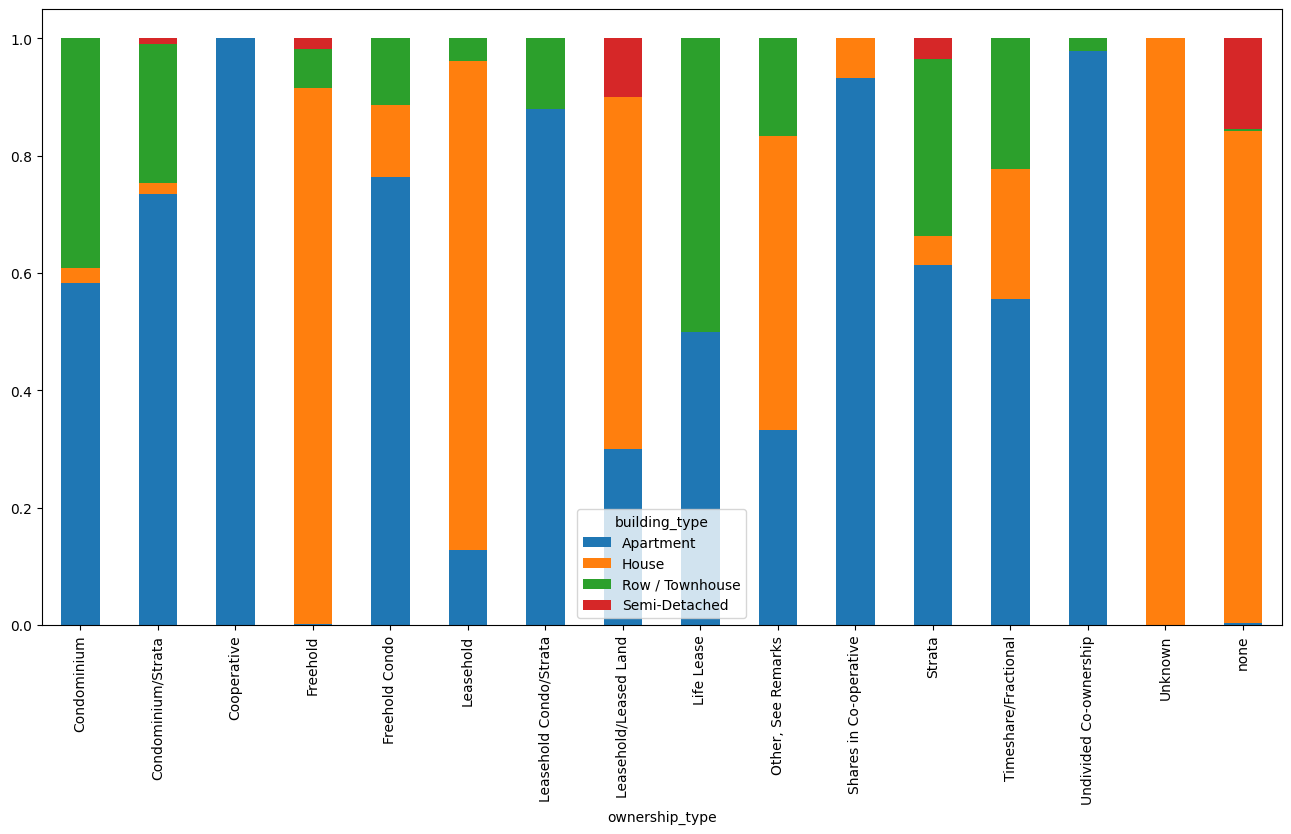

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14591
2           7385
none        2896
4             88
1 2           45
3              9
1 2 3 4        5
2 3            4
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          13324
none        2422
2            222
4             71
1 2 3 4        5
3              2
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       5083
1 2       44
1         33
none      16
4         13
3          5
2 3        2
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    447
1       264
2       114
4         1
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1966
1        970
none      11
4          3
2 3        2
3          2
1 2        1
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,14591.0,14591.0,11930.0,14591.0,14591.0,14591.0,1.459100e+04,14591.0
mean,26830742.0,3.0,2.0,-90.0,46.0,4.0,6.385021e+17,1061117.0
std,10595.0,1.0,1.0,18.0,4.0,7.0,1.350009e+12,1049830.0
min,26811883.0,0.0,0.0,-132.0,42.0,0.0,6.384991e+17,1.0
25%,26821585.0,2.0,1.0,-112.0,43.0,0.0,6.385010e+17,559942.0
50%,26830649.0,3.0,2.0,-80.0,44.0,3.0,6.385019e+17,824900.0
75%,26839952.0,4.0,2.0,-79.0,49.0,5.0,6.385030e+17,1249650.0
max,26849449.0,15.0,5.0,-53.0,59.0,529.0,6.385057e+17,49800000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2896.0,2896.0,2582.0,2896.0,2896.0,2896.0,2.896000e+03,2896.0
mean,26831122.0,2.0,2.0,-76.0,46.0,4.0,6.385021e+17,660618.0
std,11376.0,1.0,1.0,10.0,2.0,4.0,1.514189e+12,664730.0
min,26811885.0,0.0,1.0,-135.0,42.0,0.0,6.384991e+17,28000.0
25%,26821346.0,1.0,1.0,-74.0,45.0,2.0,6.385010e+17,375000.0
50%,26832007.0,2.0,2.0,-74.0,46.0,4.0,6.385020e+17,549000.0
75%,26840514.0,2.0,2.0,-73.0,46.0,6.0,6.385034e+17,774225.0
max,26849390.0,8.0,4.0,-53.0,62.0,56.0,6.385057e+17,18500000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,9.0,9.0,5.0,9.0,9.0,9.0,9.000000e+00,9.0
mean,26834515.0,2.0,1.0,-99.0,47.0,2.0,6.385025e+17,324855.0
std,11345.0,1.0,0.0,23.0,3.0,4.0,1.370895e+12,559573.0
min,26815429.0,1.0,1.0,-124.0,43.0,0.0,6.385001e+17,14900.0
25%,26825138.0,1.0,1.0,-123.0,45.0,0.0,6.385017e+17,95000.0
50%,26838910.0,2.0,1.0,-81.0,45.0,1.0,6.385029e+17,125000.0
75%,26840783.0,2.0,1.0,-80.0,49.0,1.0,6.385034e+17,259000.0
max,26847438.0,4.0,2.0,-79.0,50.0,11.0,6.385044e+17,1799998.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,88.0,88.0,62.0,88.0,88.0,88.0,8.800000e+01,88.0
mean,26830381.0,2.0,1.0,-98.0,48.0,1.0,6.385020e+17,501657.0
std,10412.0,1.0,1.0,21.0,3.0,2.0,1.334134e+12,363488.0
min,26812884.0,0.0,1.0,-125.0,43.0,0.0,6.384999e+17,79000.0
25%,26821235.0,1.0,1.0,-122.0,45.0,0.0,6.385010e+17,239975.0
50%,26831480.0,2.0,1.0,-97.0,49.0,0.0,6.385020e+17,402500.0
75%,26838909.0,2.0,1.0,-80.0,50.0,1.0,6.385029e+17,635225.0
max,26849308.0,4.0,6.0,-55.0,54.0,8.0,6.385056e+17,1985000.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,5.0,5.0,3.0,5.0,5.0,5.0,5.000000e+00,5.0
mean,26826594.0,2.0,2.0,-76.0,46.0,1.0,6.385016e+17,732420.0
std,12695.0,1.0,1.0,26.0,2.0,2.0,1.510246e+12,1058856.0
min,26812785.0,1.0,1.0,-123.0,45.0,0.0,6.384999e+17,79200.0
25%,26813049.0,1.0,2.0,-66.0,45.0,0.0,6.384999e+17,99000.0
50%,26833501.0,2.0,2.0,-65.0,46.0,0.0,6.385025e+17,395000.0
75%,26834198.0,2.0,2.0,-65.0,46.0,0.0,6.385026e+17,489900.0
max,26839439.0,3.0,2.0,-64.0,49.0,4.0,6.385029e+17,2599000.0


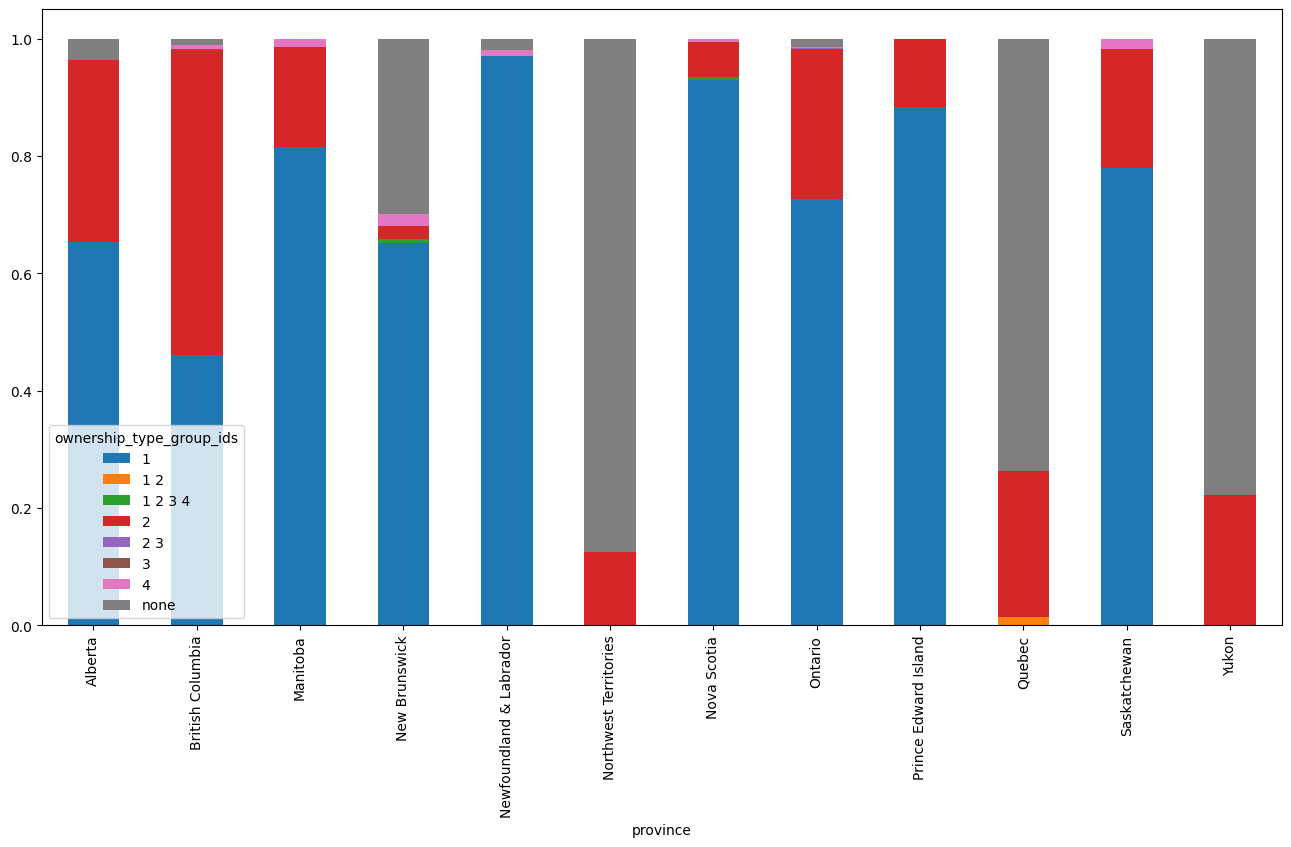

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          14591
2           7385
none        2896
4             88
1 2           45
3              9
1 2 3 4        5
2 3            4
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_6666/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    14591
2     7385
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bathrooms_total           21976 non-null  int64  
 3   bedrooms                  21976 non-null  object 
 4   stories_total             15172 non-null  float64
 5   size_interior             12520 non-null  object 
 6   building_type             21976 non-null  object 
 7   agency_name               21976 non-null  object 
 8   agency_type               21976 non-null  object 
 9   property_type             21976 non-null  object 
 10  lng                       21976 non-null  float64
 11  lat                       21976 non-null  float64
 12  ownership_type            21976 non-null  object 
 13  ownership_type_group_ids  21976 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    12286
British Columbia            4160
Alberta                     2734
Quebec                       833
Manitoba                     614
Saskatchewan                 567
Nova Scotia                  393
New Brunswick                219
Newfoundland & Labrador       98
Prince Edward Island          69
Yukon                          2
Northwest Territories          1
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6666/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    11614
True     10362
Name: count, dtype: int64

In [73]:
df.shape

(21976, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6666/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,3,3 + 0,NaN,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,Single Family,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
1,26846932,24010368,1,3 + 0,1.5,NaN,House,EXP REALTY,Firm,Single Family,...,42.291670,Freehold,1,30.12X96.37,0,https://realtor.ca/real-estate/26846932/3587-b...,638504281578600000,N9C1R8,Ontario,249900.0
2,26844388,24010340,1,2 + 0,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.306440,Freehold,1,35.01X121,0,https://realtor.ca/real-estate/26844388/859-we...,638503636611730000,N9A5J7,Ontario,299000.0
3,26843583,24010339,1,2 + 0,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,Single Family,...,42.297308,Freehold,1,40X93,0,https://realtor.ca/real-estate/26843583/2193-f...,638503600882600000,N8W2G4,Ontario,399900.0
4,26843183,24010329,1,2 + 1,1.0,NaN,House,ELITE REAL ESTATE LIMITED,Firm,Single Family,...,42.295689,Freehold,1,34X94 FEET,0,https://realtor.ca/real-estate/26843183/2260-h...,638503564680530000,N8X3S4,Ontario,249933.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6666/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    4971
1    3654
2    1462
3     235
4      35
5       3
6       1
7       1
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

21976

In [80]:
bedrooms_extra[:20]

['0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '2',
 '1',
 '1',
 '0',
 '0',
 '2',
 '0',
 '0',
 '2',
 '0',
 '1']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3 + 0,NaN,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
1,26846932,24010368,0,1,3 + 0,1.50,NaN,House,EXP REALTY,Firm,...,42.291670,Freehold,1,30.12X96.37,0,https://realtor.ca/real-estate/26846932/3587-b...,638504281578600000,N9C1R8,Ontario,249900.0
2,26844388,24010340,0,1,2 + 0,1.00,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.306440,Freehold,1,35.01X121,0,https://realtor.ca/real-estate/26844388/859-we...,638503636611730000,N9A5J7,Ontario,299000.0
3,26843583,24010339,0,1,2 + 0,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.297308,Freehold,1,40X93,0,https://realtor.ca/real-estate/26843583/2193-f...,638503600882600000,N8W2G4,Ontario,399900.0
4,26843183,24010329,1,1,2 + 1,1.00,NaN,House,ELITE REAL ESTATE LIMITED,Firm,...,42.295689,Freehold,1,34X94 FEET,0,https://realtor.ca/real-estate/26843183/2260-h...,638503564680530000,N8X3S4,Ontario,249933.0
5,26843182,24010330,0,4,5 + 0,1.75,NaN,House,CENTURY 21 REQUEST REALTY INC - 606,Firm,...,42.267667,Freehold,1,73.29XIRREG,0,https://realtor.ca/real-estate/26843182/2975-c...,638503564678330000,N9E2S9,Ontario,769000.0
6,26843181,24010331,0,2,2 + 0,NaN,1100.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.273725,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
7,26842329,24010294,1,2,2 + 1,1.00,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.266108,Freehold,1,106.78X,0,https://realtor.ca/real-estate/26842329/4866-s...,638503528522130000,N9E4X2,Ontario,530000.0
9,26841962,24010266,1,2,3 + 1,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.246747,Freehold,1,70.78XIRREG,0,https://realtor.ca/real-estate/26841962/720-ro...,638503492558730000,N9G1T8,Ontario,749900.0
10,26841959,24010300,2,3,3 + 2,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.213529,Freehold,1,140.57X226.42,0,https://realtor.ca/real-estate/26841959/7530-m...,638503492508830000,N9J2T9,Ontario,699900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6666/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  object 
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  object 
 5   stories_total             15172 non-null  float64
 6   size_interior             12520 non-null  object 
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6666/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3,NaN,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
1,26846932,24010368,0,1,3,1.50,NaN,House,EXP REALTY,Firm,...,42.291670,Freehold,1,30.12X96.37,0,https://realtor.ca/real-estate/26846932/3587-b...,638504281578600000,N9C1R8,Ontario,249900.0
2,26844388,24010340,0,1,2,1.00,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.306440,Freehold,1,35.01X121,0,https://realtor.ca/real-estate/26844388/859-we...,638503636611730000,N9A5J7,Ontario,299000.0
3,26843583,24010339,0,1,2,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.297308,Freehold,1,40X93,0,https://realtor.ca/real-estate/26843583/2193-f...,638503600882600000,N8W2G4,Ontario,399900.0
4,26843183,24010329,1,1,2,1.00,NaN,House,ELITE REAL ESTATE LIMITED,Firm,...,42.295689,Freehold,1,34X94 FEET,0,https://realtor.ca/real-estate/26843183/2260-h...,638503564680530000,N8X3S4,Ontario,249933.0
5,26843182,24010330,0,4,5,1.75,NaN,House,CENTURY 21 REQUEST REALTY INC - 606,Firm,...,42.267667,Freehold,1,73.29XIRREG,0,https://realtor.ca/real-estate/26843182/2975-c...,638503564678330000,N9E2S9,Ontario,769000.0
6,26843181,24010331,0,2,2,NaN,1100.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.273725,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
7,26842329,24010294,1,2,2,1.00,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.266108,Freehold,1,106.78X,0,https://realtor.ca/real-estate/26842329/4866-s...,638503528522130000,N9E4X2,Ontario,530000.0
9,26841962,24010266,1,2,3,1.00,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.246747,Freehold,1,70.78XIRREG,0,https://realtor.ca/real-estate/26841962/720-ro...,638503492558730000,N9G1T8,Ontario,749900.0
10,26841959,24010300,2,3,3,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.213529,Freehold,1,140.57X226.42,0,https://realtor.ca/real-estate/26841959/7530-m...,638503492508830000,N9J2T9,Ontario,699900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             15172 non-null  float64
 6   size_interior             12520 non-null  object 
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    12286
British Columbia            4160
Alberta                     2734
Quebec                       833
Manitoba                     614
Saskatchewan                 567
Nova Scotia                  393
New Brunswick                219
Newfoundland & Labrador       98
Prince Edward Island          69
Yukon                          2
Northwest Territories          1
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             15172 non-null  float64
 6   size_interior             12520 non-null  object 
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3,NaN,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
1,26846932,24010368,0,1,3,1.5,NaN,House,EXP REALTY,Firm,...,42.291670,Freehold,1,30.12X96.37,0,https://realtor.ca/real-estate/26846932/3587-b...,638504281578600000,N9C1R8,Ontario,249900.0
2,26844388,24010340,0,1,2,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,...,42.306440,Freehold,1,35.01X121,0,https://realtor.ca/real-estate/26844388/859-we...,638503636611730000,N9A5J7,Ontario,299000.0
3,26843583,24010339,0,1,2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.297308,Freehold,1,40X93,0,https://realtor.ca/real-estate/26843583/2193-f...,638503600882600000,N8W2G4,Ontario,399900.0
4,26843183,24010329,1,1,2,1.0,NaN,House,ELITE REAL ESTATE LIMITED,Firm,...,42.295689,Freehold,1,34X94 FEET,0,https://realtor.ca/real-estate/26843183/2260-h...,638503564680530000,N8X3S4,Ontario,249933.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
0.00         1
1.00      5399
1.50       637
1.75        53
2.00      7059
2.50       200
3.00      1089
3.50         1
4.00       300
5.00        44
6.00        91
7.00        26
8.00        27
9.00        13
10.00       19
11.00       13
12.00       31
13.00        4
14.00        9
15.00        9
16.00        5
17.00        8
18.00       12
19.00       11
20.00        8
21.00        7
22.00        4
23.00        5
24.00        4
25.00        9
26.00        6
27.00        2
28.00        8
29.00        1
30.00        4
31.00        4
32.00        1
33.00        2
34.00        6
35.00        2
36.00        8
38.00        4
41.00        3
42.00        1
43.00        1
44.00        4
45.00        1
46.00        3
50.00        1
52.00        1
54.00        2
55.00        2
57.00        1
61.00        2
63.00        1
84.00        1
87.00        1
250.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
0.00        1
1.00     5399
1.50      637
1.75       53
2.00     7059
2.50      200
3.00     1089
3.50        1
4.00      300
5.00       44
6.00       91
7.00       26
8.00       27
9.00       13
10.00      19
11.00      13
12.00      31
13.00       4
14.00       9
15.00       9
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
21724,26831893,R2877838,0,3,4,0.0,1864.0000,Semi-Detached,Sutton Premier Realty,Firm,...,49.188282,Freehold,1,3478 sqft,3,https://realtor.ca/real-estate/26831893/13088-...,638502006663600000,V3T3C4,British Columbia,1229800.0


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

building_type
Semi-Detached    1
Name: count, dtype: int64

In [95]:
df[df["stories_total"] == 0]["page_url"]

21724    https://realtor.ca/real-estate/26831893/13088-...
Name: page_url, dtype: object

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          3248
House              2657
Row / Townhouse     772
Semi-Detached       127
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

0        https://realtor.ca/real-estate/26848955/7333-m...
6        https://realtor.ca/real-estate/26843181/451-gr...
11       https://realtor.ca/real-estate/26841960/966-we...
15       https://realtor.ca/real-estate/26841200/252-da...
16       https://realtor.ca/real-estate/26841201/252-da...
                               ...                        
28823    https://realtor.ca/real-estate/26813634/166-sm...
28833    https://realtor.ca/real-estate/26814796/10410-...
28834    https://realtor.ca/real-estate/26848263/a-30-v...
28835    https://realtor.ca/real-estate/26846452/8-18-b...
28854    https://realtor.ca/real-estate/26821369/32-tra...
Name: page_url, Length: 6804, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  object 
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     12204
2.00      7059
3.00      1089
1.50       637
4.00       300
2.50       200
6.00        91
1.75        53
5.00        44
12.00       31
8.00        27
7.00        26
10.00       19
11.00       13
9.00        13
18.00       12
19.00       11
14.00        9
25.00        9
15.00        9
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

194      https://realtor.ca/real-estate/26842314/131-ta...
267      https://realtor.ca/real-estate/26833961/204-ro...
436      https://realtor.ca/real-estate/26819116/273-lo...
475      https://realtor.ca/real-estate/26815257/739-br...
477      https://realtor.ca/real-estate/26815254/741-br...
                               ...                        
28718    https://realtor.ca/real-estate/26831010/10604-...
28722    https://realtor.ca/real-estate/26823056/8505-7...
28723    https://realtor.ca/real-estate/26823055/8503-7...
28729    https://realtor.ca/real-estate/26815371/10019-...
28796    https://realtor.ca/real-estate/26835224/1646-2...
Name: page_url, Length: 1089, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec              623
Alberta             318
British Columbia    183
Ontario              92
Saskatchewan          5
Nova Scotia           2
New Brunswick         1
Manitoba              1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

536      https://realtor.ca/real-estate/26847513/3900-s...
573      https://realtor.ca/real-estate/26844360/300-ev...
668      https://realtor.ca/real-estate/26837027/3635-s...
795      https://realtor.ca/real-estate/26830588/40-191...
1030     https://realtor.ca/real-estate/26829980/120-20...
                               ...                        
28796    https://realtor.ca/real-estate/26835224/1646-2...
28801    https://realtor.ca/real-estate/26829065/131-20...
28816    https://realtor.ca/real-estate/26818487/305-10...
28819    https://realtor.ca/real-estate/26815696/1211-7...
28820    https://realtor.ca/real-estate/26815074/1305-3...
Name: page_url, Length: 1225, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
28830    False
28833    False
28834    False
28835    False
28854    False
Length: 21976, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
28830    True
28833    True
28834    True
28835    True
28854    True
Length: 21976, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 536 to 28820
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1225 non-null   int64  
 1   id_mls                    1225 non-null   object 
 2   bedrooms_extra            1225 non-null   int64  
 3   bathrooms_total           1225 non-null   int64  
 4   bedrooms                  1225 non-null   int64  
 5   stories_total             1225 non-null   float64
 6   size_interior             1144 non-null   object 
 7   building_type             1225 non-null   object 
 8   agency_name               1225 non-null   object 
 9   agency_type               1225 non-null   object 
 10  property_type             1225 non-null   object 
 11  lng                       1225 non-null   float64
 12  lat                       1225 non-null   float64
 13  ownership_type            1225 non-null   object 
 14  ownership_

In [106]:
# df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# set storeys for all appartments to 1
df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    13429
2.00     6887
3.00      759
1.50      635
2.50      200
1.75       53
4.00       11
3.50        1
5.00        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([1.  , 1.5 , 1.75, 2.  , 2.5 , 3.  , 4.  , 3.5 , 5.  ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    12286
British Columbia            4160
Alberta                     2734
Quebec                       833
Manitoba                     614
Saskatchewan                 567
Nova Scotia                  393
New Brunswick                219
Newfoundland & Labrador       98
Prince Edward Island          69
Yukon                          2
Northwest Territories          1
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  object 
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1000.0000    26
1100.0000    25
1200.0000    25
1800.0000    23
1200 sqft    23
             ..
8631 sqft     1
4768 sqft     1
3216 sqft     1
2736 sqft     1
1788 sqft     1
Name: count, Length: 7035, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3,1.0,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
6,26843181,24010331,0,2,2,1.0,1100.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.273725,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
15,26841200,24010176,0,2,2,1.0,1595.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26841200/252-da...,638503456637300000,N9V1W7,Ontario,749900.0
16,26841201,24010173,0,2,2,1.0,1595.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Freehold,1,0X,0,https://realtor.ca/real-estate/26841201/252-da...,638503456643200000,N9V1W7,Ontario,749900.0
17,26841193,24010281,2,2,2,1.0,1800.0000,House,REALTY ONE GROUP ICONIC,Firm,...,42.236773,Freehold,1,34X140,0,https://realtor.ca/real-estate/26841193/3198-t...,638503456591670000,N9H1H3,Ontario,983900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28830,26846632,A2128597,1,3,3,1.0,1119 sqft,House,RE/MAX Grande Prairie,Firm,...,58.515991,Freehold,1,"668.88 m2|4,051 - 7,250 sqft",2,https://realtor.ca/real-estate/26846632/10403-...,638503922404670000,T0H1Z0,Alberta,269900.0
28833,26814796,A2126470,3,3,2,1.0,1620 sqft,House,RE/MAX Grande Prairie,Firm,...,58.188292,Freehold,1,"1196 m2|10,890 - 21,799 sqft (1/4 - 1/2 ac)",5,https://realtor.ca/real-estate/26814796/10410-...,638500085687870000,T0H2H0,Alberta,395000.0
28834,26848263,15593,0,2,2,1.0,1356 sqft,Semi-Detached,RE/MAX ACTION REALTY,Firm,...,60.693576,Condominium/Strata,2,5650 sqft,0,https://realtor.ca/real-estate/26848263/a-30-v...,638504734717900000,Y1A6V9,Yukon,499900.0
28835,26846452,15592,0,2,4,1.0,1788 sqft,Row / Townhouse,2% Realty Midnight Sun,Firm,...,60.769481,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26846452/8-18-b...,638503852795200000,Y1A0K8,Yukon,535000.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3,1.0,1613.0000,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
6,26843181,24010331,0,2,2,1.0,1100.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.273725,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
15,26841200,24010176,0,2,2,1.0,1595.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26841200/252-da...,638503456637300000,N9V1W7,Ontario,749900.0
16,26841201,24010173,0,2,2,1.0,1595.0000,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Freehold,1,0X,0,https://realtor.ca/real-estate/26841201/252-da...,638503456643200000,N9V1W7,Ontario,749900.0
17,26841193,24010281,2,2,2,1.0,1800.0000,House,REALTY ONE GROUP ICONIC,Firm,...,42.236773,Freehold,1,34X140,0,https://realtor.ca/real-estate/26841193/3198-t...,638503456591670000,N9H1H3,Ontario,983900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,26827441,40581005,0,1,2,1.0,1428.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.257461,Freehold,1,1.14 ac|1/2 - 1.99 acres,0,https://realtor.ca/real-estate/26827441/3004-s...,638501817912000000,P0H1V0,Ontario,499000.0
17464,26819891,40580300,0,3,4,1.0,2443.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,46.305128,Freehold,1,5.247 ac|5 - 9.99 acres,16,https://realtor.ca/real-estate/26819891/541-do...,638500899938470000,P0H1V0,Ontario,658900.0
18755,26814319,40579255,0,2,4,2.0,2164.0000,House,"Royal LePage Northern Life Realty, Brokerage",Firm,...,47.071110,Freehold,1,2.1 ac|2 - 4.99 acres,19,https://realtor.ca/real-estate/26814319/33-whi...,638500059912530000,P0H2H0,Ontario,2299000.0
19497,26840831,TB241108,0,2,2,1.0,1050.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.382907,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26840831/702-13...,638503411223930000,P7E6M3,Ontario,165000.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
23296,26848333,A2129093,1,4,3,2.0,1670 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.635680,Freehold,1,"3750 sqft|0-4,050 sqft",3,https://realtor.ca/real-estate/26848333/7915-1...,638504789575230000,T0K0M0,Alberta,549000.0
23297,26848331,A2129089,1,4,3,2.0,1670 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.635785,Freehold,1,"3750 sqft|0-4,050 sqft",3,https://realtor.ca/real-estate/26848331/7913-1...,638504782473330000,T0K0M0,Alberta,549000.0
23300,26840133,A2128614,1,2,2,1.0,1299 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.586003,Freehold,1,"9375 sqft|7,251 - 10,889 sqft",10,https://realtor.ca/real-estate/26840133/207-ro...,638503061697430000,T0K1H0,Alberta,189000.0
23301,26836849,A2127939,3,5,3,1.0,1716 sqft,House,Century 21 Foothills South Real Estate,Firm,...,49.549052,Freehold,1,5.36 ac|5 - 9.99 acres,0,https://realtor.ca/real-estate/26836849/1802-e...,638502730648730000,T0K1C0,Alberta,1195000.0
23302,26834658,A2127740,2,4,3,2.0,1775 sqft,House,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.645644,Condominium/Strata,2,"14215.36 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",5,https://realtor.ca/real-estate/26834658/9-kana...,638502622724800000,T0K0E0,Alberta,949000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28823,26813634,A2126533,1,3,3,1.0,1410 sqft,House,COLDWELL BANKER UNITED,Firm,...,56.756492,Freehold,1,"4951.56 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26813634/166-sm...,638500010354230000,T9K2J7,Alberta,499900.0
28824,26813392,A2126884,0,3,3,2.0,1389.64 sqft,Row / Townhouse,COLDWELL BANKER UNITED,Firm,...,56.753632,Condominium/Strata,2,"0.00|0-4,050 sqft",2,https://realtor.ca/real-estate/26813392/51-240...,638500004423530000,T9k2W2,Alberta,224900.0
28825,26812576,A2126985,0,2,3,1.0,1520 sqft,House,SELLER DIRECT NORTHERN HOMES REALTY,Firm,...,56.761902,Condominium/Strata,2,"4489 sqft|4,051 - 7,250 sqft",2,https://realtor.ca/real-estate/26812576/116-mc...,638499626136530000,T9K2M6,Alberta,285000.0
28830,26846632,A2128597,1,3,3,1.0,1119 sqft,House,RE/MAX Grande Prairie,Firm,...,58.515991,Freehold,1,"668.88 m2|4,051 - 7,250 sqft",2,https://realtor.ca/real-estate/26846632/10403-...,638503922404670000,T0H1Z0,Alberta,269900.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
13399,26849159,9265752,0,2,2,1.0,993.51 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.475457,Condominium/Strata,2,124.21 m2,1,https://realtor.ca/real-estate/26849159/139b-c...,638505510619100000,J8T1P8,Quebec,284900.0
13410,26848774,16182571,0,2,2,1.0,1406.84 sqft,Apartment,RE/MAX VISION,Firm,...,45.649059,Condominium/Strata,2,1526.7 sqft,2,https://realtor.ca/real-estate/26848774/120-ch...,638505297562070000,J0X3G0,Quebec,409900.0
13418,26848448,27549851,0,1,3,1.0,1106.53 sqft,Row / Townhouse,RE/MAX VISION,Firm,...,45.466424,Condominium/Strata,2,257.3 m2,2,https://realtor.ca/real-estate/26848448/124-ru...,638505081835400000,J8Z1X8,Quebec,349900.0
13422,26848334,14332884,0,1,1,1.0,616.77 sqft,Apartment,LION IMMOBILIER,Firm,...,45.435457,Condominium/Strata,2,14.39 m2,1,https://realtor.ca/real-estate/26848334/185-ru...,638504792469930000,J8X0B2,Quebec,449000.0
13484,26846149,22267007,0,1,2,1.0,1024.72 sqft,Apartment,AGENCE IMMOBILIÈRE ROYAL,Firm,...,45.440320,Condominium/Strata,2,29.73 m2,1,https://realtor.ca/real-estate/26846149/285-ru...,638503785755030000,J8X3W9,Quebec,289900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18806,26839304,24215535,0,1,2,1.0,14178.22 sqft,Apartment,IMMEUBLES G.L.M.C. INC.,Firm,...,47.913199,Condominium/Strata,2,329.3 m2,1,https://realtor.ca/real-estate/26839304/139-ru...,638502894139430000,G0L1G0,Quebec,214000.0
19685,26821063,26114021,0,2,3,1.0,754.4 sqft,House,VIA CAPITALE SAGUENAY LAC ST-JEAN - Jonquière,Firm,...,48.395733,Condominium/Strata,2,2615.6 sqft,2,https://realtor.ca/real-estate/26821063/2855-r...,638500951940000000,G7Y1A2,Quebec,269000.0
19717,26831963,9724956,0,1,3,1.0,880.49 sqft,Apartment,VIA CAPITALE HORIZON,Firm,...,48.440685,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26831963/174-2e...,638502024488800000,G5L4X5,Quebec,219000.0
19729,26817630,9586810,0,1,1,1.0,59.64 m2,Apartment,VIA CAPITALE HORIZON,Firm,...,48.440015,Condominium/Strata,2,119.4 m2,2,https://realtor.ca/real-estate/26817630/242-ru...,638500364055930000,G5L4V5,Quebec,189000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_6666/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14566,26824608,17151330,0,1,2,1.0,97.3 m2,Apartment,PROPRIO DIRECT,Firm,...,45.400409,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26824608/3123-b...,638501621365400000,J7V0T6,Quebec,444900.0
14759,26849082,10286544,0,1,2,1.0,89.6 m2,Apartment,ENGEL & VÖLKERS MONTRÉAL - Outremont,Firm,...,45.470956,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26849082/2233-a...,638505472089670000,H4A2Z2,Quebec,725000.0
14812,26848397,25341081,0,1,1,1.0,68.49 m2,Apartment,VENDIRECT INC.,Firm,...,45.597765,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26848397/7405-r...,638504844992200000,H1M3R5,Quebec,395000.0
14843,26848002,23420367,0,1,2,1.0,97 m2,Apartment,VIA CAPITALE EXPERTISE,Firm,...,45.541082,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26848002/2425-b...,638504569996200000,J0N1P0,Quebec,349000.0
14895,26847042,16880249,0,1,1,1.0,41.2 m2,Apartment,RE/MAX DU CARTIER INC. - VILLERAY,Firm,...,45.496510,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26847042/950-ru...,638504323135200000,H3C0K3,Quebec,395000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    1111
Quebec       28
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
14566,26824608,17151330,0,1,2,1.0,1047.3372,Apartment,PROPRIO DIRECT,Firm,...,45.400409,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26824608/3123-b...,638501621365400000,J7V0T6,Quebec,444900.0
14759,26849082,10286544,0,1,2,1.0,964.4544,Apartment,ENGEL & VÖLKERS MONTRÉAL - Outremont,Firm,...,45.470956,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26849082/2233-a...,638505472089670000,H4A2Z2,Quebec,725000.0
14812,26848397,25341081,0,1,1,1.0,737.22636,Apartment,VENDIRECT INC.,Firm,...,45.597765,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26848397/7405-r...,638504844992200000,H1M3R5,Quebec,395000.0
14843,26848002,23420367,0,1,2,1.0,1044.108,Apartment,VIA CAPITALE EXPERTISE,Firm,...,45.541082,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26848002/2425-b...,638504569996200000,J0N1P0,Quebec,349000.0
14895,26847042,16880249,0,1,1,1.0,443.4768,Apartment,RE/MAX DU CARTIER INC. - VILLERAY,Firm,...,45.496510,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26847042/950-ru...,638504323135200000,H3C0K3,Quebec,395000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_6666/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
178,26843564,24010323,0,2,4,2.0,1607 sqft,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.596447,Freehold,1,50X108|under 1/4 acre,0,https://realtor.ca/real-estate/26843564/318-ne...,638503598496370000,N8A4G6,Ontario,439000.0
218,26841178,24010285,0,1,2,1.0,900 sqft,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.639195,Freehold,1,51.37X135|under 1/4 acre,0,https://realtor.ca/real-estate/26841178/4678-r...,638503454445930000,N0P2B0,Ontario,729900.0
362,26826914,24009761,1,2,2,1.0,1024 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.400985,Freehold,1,33.9XIRREG.|under 1/4 acre,0,https://realtor.ca/real-estate/26826914/26-vil...,638501804729600000,N7L5P5,Ontario,499900.0
392,26824855,24010006,0,2,2,1.5,1400 sqft,House,GAGNER & ASSOCIATES EXCEL REALTY SERVICES INC....,Firm,...,42.317186,Freehold,1,40.16X96|under 1/4 acre,0,https://realtor.ca/real-estate/26824855/19260-...,638501660622800000,N0P2L0,Ontario,799900.0
502,26813321,24009759,1,5,4,1.0,4119 sqft,House,DEERBROOK REALTY INC.,Firm,...,42.509641,Freehold,1,180.86XIRREG|1 - 3 acres,0,https://realtor.ca/real-estate/26813321/11526-...,638499998416900000,N0P1V0,Ontario,699900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3158
Alberta                    1623
Quebec                      776
Manitoba                    610
Saskatchewan                567
Ontario                     503
Newfoundland & Labrador      97
New Brunswick                96
Yukon                         2
Northwest Territories         1
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
178,26843564,24010323,0,2,4,2.0,1607.0,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.596447,Freehold,1,50X108|under 1/4 acre,0,https://realtor.ca/real-estate/26843564/318-ne...,638503598496370000,N8A4G6,Ontario,439000.0
218,26841178,24010285,0,1,2,1.0,900.0,House,RIVERSITE REALTY INC. II Brokerage,Firm,...,42.639195,Freehold,1,51.37X135|under 1/4 acre,0,https://realtor.ca/real-estate/26841178/4678-r...,638503454445930000,N0P2B0,Ontario,729900.0
362,26826914,24009761,1,2,2,1.0,1024.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.400985,Freehold,1,33.9XIRREG.|under 1/4 acre,0,https://realtor.ca/real-estate/26826914/26-vil...,638501804729600000,N7L5P5,Ontario,499900.0
392,26824855,24010006,0,2,2,1.5,1400.0,House,GAGNER & ASSOCIATES EXCEL REALTY SERVICES INC....,Firm,...,42.317186,Freehold,1,40.16X96|under 1/4 acre,0,https://realtor.ca/real-estate/26824855/19260-...,638501660622800000,N0P2L0,Ontario,799900.0
502,26813321,24009759,1,5,4,1.0,4119.0,House,DEERBROOK REALTY INC.,Firm,...,42.509641,Freehold,1,180.86XIRREG|1 - 3 acres,0,https://realtor.ca/real-estate/26813321/11526-...,638499998416900000,N0P1V0,Ontario,699900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  object 
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  float64
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    12286
British Columbia            4160
Alberta                     2734
Quebec                       833
Manitoba                     614
Saskatchewan                 567
Nova Scotia                  393
New Brunswick                219
Newfoundland & Labrador       98
Prince Edward Island          69
Yukon                          2
Northwest Territories          1
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                    8958
Nova Scotia                 393
Prince Edward Island         69
Quebec                       29
Manitoba                      4
British Columbia              2
Newfoundland & Labrador       1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           4158.0
Ontario                    3328.0
Quebec                      804.0
Manitoba                    610.0
Newfoundland & Labrador      97.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  float64
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                                  1670
0                                                                985
Unknown                                                          621
under 1 acre                                                     199
1/2 - 1.99 acres                                                 156
                                                                ... 
90 x 165 FT ; As Survey                                            1
7.88 x 27.49 M ; Irregular As Per Survey                           1
50.91 x 110.02 FT                                                  1
76.94 x 152.03 FT ; Swimming Pool-Waterpool-Out Dr Bbq-Morer       1
5532                                                               1
Name: count, Length: 11268, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3,1.0,1613.0,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
6,26843181,24010331,0,2,2,1.0,1100.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.273725,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
15,26841200,24010176,0,2,2,1.0,1595.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26841200/252-da...,638503456637300000,N9V1W7,Ontario,749900.0
16,26841201,24010173,0,2,2,1.0,1595.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Freehold,1,0X,0,https://realtor.ca/real-estate/26841201/252-da...,638503456643200000,N9V1W7,Ontario,749900.0
21,26840881,24010271,0,1,1,1.0,522.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.316116,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26840881/150-pa...,638503418462300000,N9A7A2,Ontario,250000.0
26,26838619,24010239,0,0,3,1.0,1613.0,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0X0,0,https://realtor.ca/real-estate/26838619/7333-m...,638502842455130000,N9H0E4,Ontario,749900.0
37,26836169,X8297874,0,1,1,1.0,NaN,Apartment,RE/MAX ABOUTOWNE REALTY CORP.,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26836169/1307-1...,638502679865030000,N9A7A2,Ontario,274900.0
49,26834940,24010187,0,2,2,1.0,1172.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.319683,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26834940/75-riv...,638502628518830000,N9A7C4,Ontario,499000.0
50,26834589,40581866,0,1,1,1.0,775.0,Apartment,"RE/MAX Aboutowne Realty Corp., Brokerage",Firm,...,42.316310,Condominium,2,NaN,1,https://realtor.ca/real-estate/26834589/150-pa...,638502614370770000,N9A7A2,Ontario,274900.0
54,26833953,24010166,0,1,1,1.0,NaN,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26833953/75-riv...,638502556669500000,N9A7C4,Ontario,329900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

0      https://realtor.ca/real-estate/26848955/7333-m...
6      https://realtor.ca/real-estate/26843181/451-gr...
15     https://realtor.ca/real-estate/26841200/252-da...
16     https://realtor.ca/real-estate/26841201/252-da...
21     https://realtor.ca/real-estate/26840881/150-pa...
26     https://realtor.ca/real-estate/26838619/7333-m...
37     https://realtor.ca/real-estate/26836169/1307-1...
49     https://realtor.ca/real-estate/26834940/75-riv...
50     https://realtor.ca/real-estate/26834589/150-pa...
54     https://realtor.ca/real-estate/26833953/75-riv...
71     https://realtor.ca/real-estate/26829143/75-riv...
79     https://realtor.ca/real-estate/26826551/5850-n...
127    https://realtor.ca/real-estate/26815258/150-pa...
129    https://realtor.ca/real-estate/26815252/1888-w...
135    https://realtor.ca/real-estate/26813352/75-riv...
180    https://realtor.ca/real-estate/26843188/728-br...
195    https://realtor.ca/real-estate/26842045/155-fr...
211    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                        734
Unknown                  361
under 1 acre             107
0 x 0                     67
under 1/2 acre            48
                        ... 
716 sqft                   1
536 sqft                   1
897 sqft                   1
659 sqft                   1
24.0000|50 - 79 acres      1
Name: count, Length: 433, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26848955,24010397,0,3,3,1.0,1613.0,Apartment,NU STREAM REALTY (TORONTO) INC,Firm,...,42.224621,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26848955/7333-m...,638505400607600000,N9H0E4,Ontario,3300.0
6,26843181,24010331,0,2,2,1.0,1100.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.273725,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26843181/451-gr...,638503564676330000,N9E4S2,Ontario,389900.0
15,26841200,24010176,0,2,2,1.0,1595.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26841200/252-da...,638503456637300000,N9V1W7,Ontario,749900.0
16,26841201,24010173,0,2,2,1.0,1595.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 586,Firm,...,42.102140,Freehold,1,0,0,https://realtor.ca/real-estate/26841201/252-da...,638503456643200000,N9V1W7,Ontario,749900.0
21,26840881,24010271,0,1,1,1.0,522.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.316116,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26840881/150-pa...,638503418462300000,N9A7A2,Ontario,250000.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  float64
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                                        5124
under 1/2 acre                                           1622
Unknown                                                   260
0                                                         251
1/2 - 1.99 acres                                          155
                                                         ... 
40.85 x 143.23 FT ; Irregular Lot (Ravine)                  1
45.22 x 118.38 FT                                           1
85 x 313 FT ; 204.57 X 53.47 X 317.20  X 94.49 105.44       1
33.5 x 153 FT                                               1
5532                                                        1
Name: count, Length: 10864, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

10865

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
40.85 x 143.23 FT ; Irregular Lot (Ravine)               1
45.22 x 118.38 FT                                        1
85 x 313 FT ; 204.57 X 53.47 X 317.20  X 94.49 105.44    1
33.5 x 153 FT                                            1
5532                                                     1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    15334
True        10
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_6666/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                                            5124
under 1/2 acre                                               2310
Unknown                                                       260
0                                                             251
1/2 - 1.99 acres                                              155
                                                             ... 
50 x 108.5 FT                                                   1
147 x 729.7 FT|2 - 4.99 acres                                   1
20.04 x 90.33 FT ; 20.04   X 90.33  X 20.04   X 90.33  Ft       1
19 x 85 FT                                                      1
5532                                                            1
Name: count, Length: 10292, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_6666/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
107,26820192,24009919,1,3,2,1.0,1332.0,House,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.269528,Freehold,1,52.79Xirregular,0,https://realtor.ca/real-estate/26820192/996-vi...,638500936576070000,N9E4Y1,Ontario,629900.0
230,26840454,24010251,1,3,3,1.5,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.022193,Freehold,1,80Xirreg (280),0,https://realtor.ca/real-estate/26840454/377-he...,638503346490230000,N9Y3B3,Ontario,1499000.0
521,26812753,24009781,0,1,2,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.013207,Freehold,1,76X105 (irr.),0,https://realtor.ca/real-estate/26812753/897-lo...,638499890545430000,N9Y2E9,Ontario,399900.0
5060,26844122,W8303862,2,2,3,1.0,NaN,House,ROYAL LEPAGE CERTIFIED REALTY,Firm,...,43.416049,Freehold,1,65.26 x 115.91 FT ; Gorgeous Lot - First Time ...,6,https://realtor.ca/real-estate/26844122/520-sa...,638503614955300000,L6L4G4,Ontario,1369900.0
8527,26819471,W8287700,0,2,3,2.0,NaN,House,KELLER WILLIAMS REAL ESTATE ASSOCIATES,Firm,...,43.705974,Freehold,1,30.1 x 121.78 FT ; See Virtual Tour,3,https://realtor.ca/real-estate/26819471/31-ske...,638500882953370000,L6V2T8,Ontario,799900.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  float64
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           23
Ontario                    11
Newfoundland & Labrador     2
Saskatchewan                1
Northwest Territories       1
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    12275.0
British Columbia            4137.0
Saskatchewan                 566.0
Newfoundland & Labrador       96.0
Northwest Territories          0.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21976 entries, 0 to 28854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21976 non-null  int64  
 1   id_mls                    21976 non-null  object 
 2   bedrooms_extra            21976 non-null  int64  
 3   bathrooms_total           21976 non-null  int64  
 4   bedrooms                  21976 non-null  int64  
 5   stories_total             21976 non-null  float64
 6   size_interior             12520 non-null  float64
 7   building_type             21976 non-null  object 
 8   agency_name               21976 non-null  object 
 9   agency_type               21976 non-null  object 
 10  property_type             21976 non-null  object 
 11  lng                       21976 non-null  float64
 12  lat                       21976 non-null  float64
 13  ownership_type            21976 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117767 entries, 0 to 117766
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        117767 non-null  int64  
 1   id_mls                    117767 non-null  object 
 2   bathrooms_total           117767 non-null  float64
 3   bedrooms_extra            117767 non-null  float64
 4   bedrooms                  117767 non-null  float64
 5   stories_total             117767 non-null  float64
 6   size_interior             117767 non-null  float64
 7   building_type             117767 non-null  object 
 8   agency_name               117767 non-null  object 
 9   agency_type               117767 non-null  object 
 10  property_type             117767 non-null  object 
 11  lng                       117767 non-null  float64
 12  lat                       117767 non-null  float64
 13  ownership_type            117767 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(21976, 22)

In [151]:
df_init.shape

(117767, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(21845, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(17534, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,17534.0,17534.0,17534.0,17534.0,17534.0,10313.0,17534.0,17534.0,17534.0,17534.0,1.753400e+04,17534.0
mean,26830732.0,0.0,2.0,3.0,1.0,1548.0,-93.0,46.0,1.0,2.0,6.385021e+17,835484.0
std,10632.0,1.0,1.0,1.0,0.0,818.0,19.0,4.0,0.0,3.0,1.356765e+12,600461.0
min,26811883.0,0.0,0.0,0.0,1.0,218.0,-135.0,42.0,1.0,0.0,6.384991e+17,54900.0
25%,26821602.0,0.0,2.0,2.0,1.0,975.0,-114.0,44.0,1.0,0.0,6.385010e+17,479900.0
50%,26830676.0,0.0,2.0,3.0,1.0,1332.0,-81.0,45.0,1.0,2.0,6.385019e+17,699000.0
75%,26839931.0,0.0,3.0,3.0,2.0,1973.0,-79.0,49.0,2.0,4.0,6.385030e+17,999000.0
max,26849449.0,2.0,5.0,8.0,3.0,14178.0,-53.0,61.0,2.0,12.0,6.385057e+17,15888888.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
size_interior               0.721986
bathrooms_total             0.634267
bedrooms                    0.464517
stories_total               0.291599
lat                         0.051789
id                          0.026549
timestamp                   0.023307
lng                        -0.067482
ownership_type_group_ids   -0.218579
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17534 entries, 1 to 28834
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17534 non-null  float64
 1   id_mls                    17534 non-null  object 
 2   bedrooms_extra            17534 non-null  float64
 3   bathrooms_total           17534 non-null  float64
 4   bedrooms                  17534 non-null  float64
 5   stories_total             17534 non-null  float64
 6   size_interior             10313 non-null  float64
 7   building_type             17534 non-null  object 
 8   agency_name               17534 non-null  object 
 9   agency_type               17534 non-null  object 
 10  property_type             17534 non-null  object 
 11  lng                       17534 non-null  float64
 12  lat                       17534 non-null  float64
 13  ownership_type            17534 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17534 entries, 1 to 28834
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17534 non-null  float64
 1   id_mls                    17534 non-null  object 
 2   bedrooms_extra            17534 non-null  float64
 3   bathrooms_total           17534 non-null  float64
 4   bedrooms                  17534 non-null  float64
 5   stories_total             17534 non-null  float64
 6   size_interior             10313 non-null  float64
 7   building_type             17534 non-null  object 
 8   agency_name               17534 non-null  object 
 9   agency_type               17534 non-null  object 
 10  property_type             17534 non-null  object 
 11  lng                       17534 non-null  float64
 12  lat                       17534 non-null  float64
 13  ownership_type            17534 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17534 entries, 1 to 28834
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17534 non-null  float64
 1   id_mls                    17534 non-null  object 
 2   bedrooms_extra            17534 non-null  float64
 3   bathrooms_total           17534 non-null  float64
 4   bedrooms                  17534 non-null  float64
 5   stories_total             17534 non-null  float64
 6   size_interior             10313 non-null  float64
 7   building_type             17534 non-null  object 
 8   agency_name               17534 non-null  object 
 9   agency_type               17534 non-null  object 
 10  property_type             17534 non-null  object 
 11  lng                       17534 non-null  float64
 12  lat                       17534 non-null  float64
 13  ownership_type            17534 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135301 entries, 0 to 28834
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        135301 non-null  float64
 1   id_mls                    135301 non-null  object 
 2   bathrooms_total           135301 non-null  float64
 3   bedrooms_extra            135301 non-null  float64
 4   bedrooms                  135301 non-null  float64
 5   stories_total             135301 non-null  float64
 6   size_interior             128080 non-null  float64
 7   building_type             135301 non-null  object 
 8   agency_name               135301 non-null  object 
 9   agency_type               135301 non-null  object 
 10  property_type             135301 non-null  object 
 11  lng                       135301 non-null  float64
 12  lat                       135301 non-null  float64
 13  ownership_type            135301 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

134925

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(134925, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134925 entries, 0 to 28834
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        134925 non-null  float64
 1   id_mls                    134925 non-null  object 
 2   bathrooms_total           134925 non-null  float64
 3   bedrooms_extra            134925 non-null  float64
 4   bedrooms                  134925 non-null  float64
 5   stories_total             134925 non-null  float64
 6   size_interior             127869 non-null  float64
 7   building_type             134925 non-null  object 
 8   agency_name               134925 non-null  object 
 9   agency_type               134925 non-null  object 
 10  property_type             134925 non-null  object 
 11  lng                       134925 non-null  float64
 12  lat                       134925 non-null  float64
 13  ownership_type            134925 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    63954
British Columbia           29781
Alberta                    18524
Quebec                      8570
Saskatchewan                5223
Manitoba                    3987
Nova Scotia                 2249
New Brunswick               1568
Prince Edward Island         462
Newfoundland & Labrador      445
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-05-06.csv", index=False)